In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

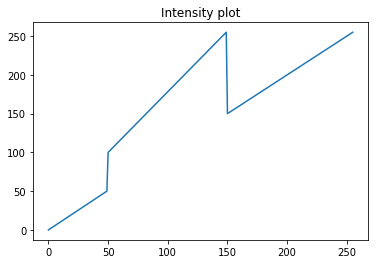

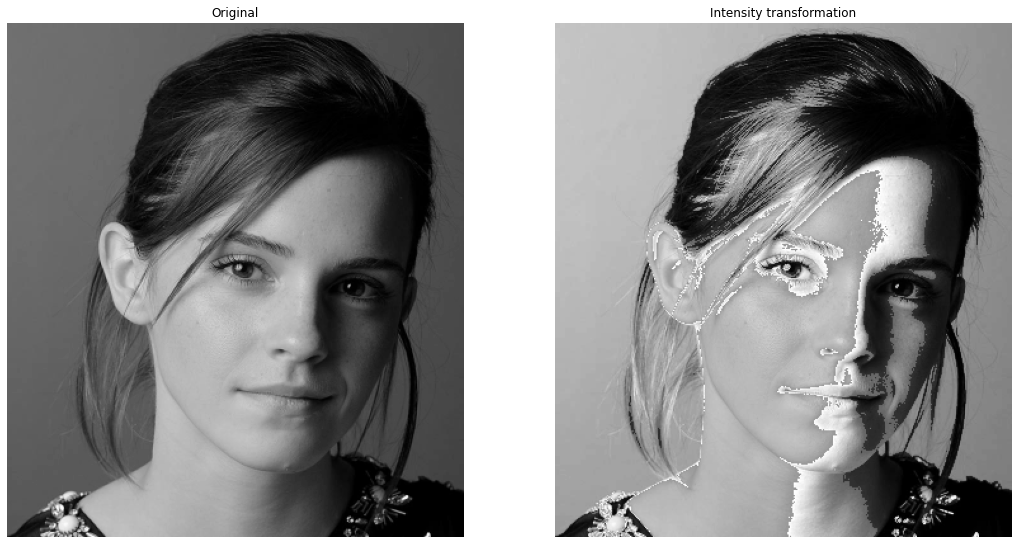

In [3]:
a1 = np.linspace(0,50,50)
a2 = np.linspace(100,255,100)
a3 = np.linspace(150,255,106)

intensity = np.concatenate((a1,a2,a3),axis=0)
plt.plot(intensity)
plt.title('Intensity plot')

img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\emma_gray.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
g = cv.LUT(img,intensity)

fig, ax = plt.subplots(1,2,figsize=(18,18))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(g,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Intensity transformation')
ax[1].axis('off')

plt.show()


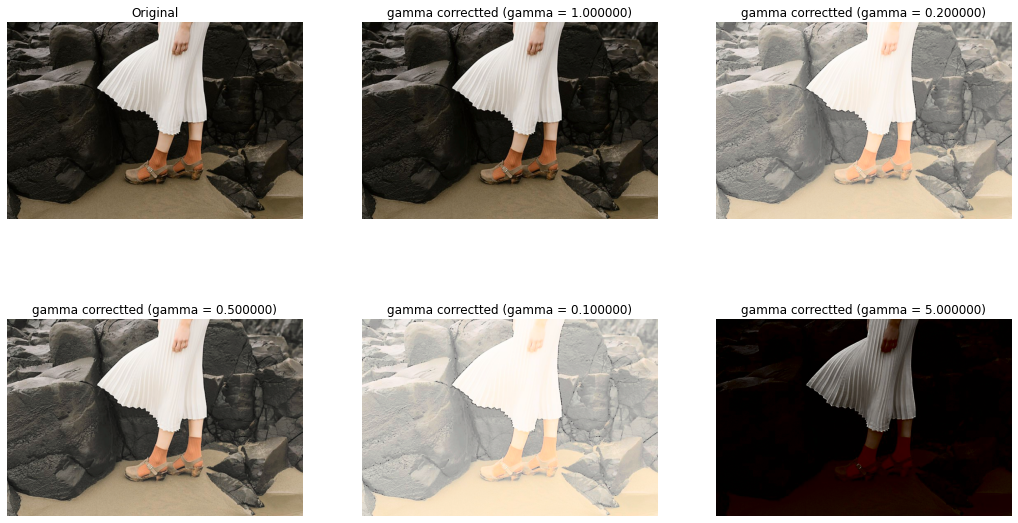

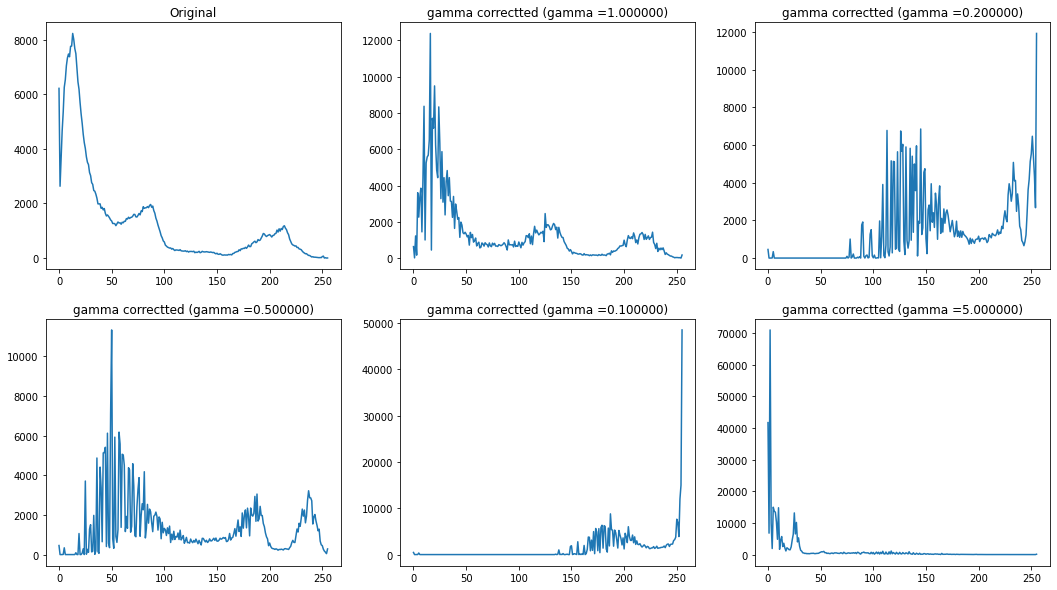

In [11]:
img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\highlights_and_shadows.jpg')
gammas = [0.1, 0.2, 0.5, 1, 5]
fig, ax = plt.subplots(2,3,figsize=(18,10))
fig2, ax2 = plt.subplots(2,3,figsize=(18,10))

hist_img = cv.calcHist([img], [0], None, [256], [0,256])
ax[0,0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB),vmin=0,vmax=255 )
ax[0,0].set_title("Original")
ax[0,0].axis('off')

ax2[0,0].plot(hist_img)
ax2[0,0].set_title("Original")

for n,gamma in enumerate(gammas,1):
    lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
    t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
    lab[:,:,0] = cv.LUT(lab[:,:,0],t)
    lab = cv.cvtColor(lab, cv.COLOR_Lab2RGB)
    ax[n%2,n%3].imshow(lab, vmin=0,vmax=255)
    ax[n%2,n%3].set_title("gamma correctted (gamma = %f)" % (gamma))
    ax[n%2,n%3].axis('off')

    hist_lab = cv.calcHist([lab], [0], None, [256], [0,256])
    ax2[n%2,n%3].plot(hist_lab)
    ax2[n%2,n%3].set_title("gamma correctted (gamma =%f)" % (gamma))
plt.show()


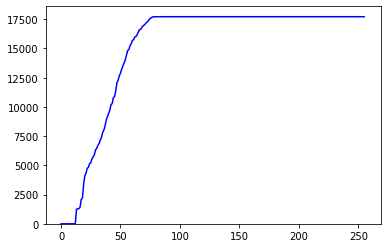

In [16]:
img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\shells.png')

hist_img = cv.calcHist([img], [0], None, [256], [0,256])
# eq = cv.equalizeHist(img)

# hist_eq = cv.calcHist([eq],[0], None, [256], [0,256])
cdf = hist_img.cumsum()
cdf_normalized = cdf * (hist_img.max()/cdf.max())
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.show()